# Example: 2D segmentation of anisotropic data

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../../")
from bayseg import BaySeg

## Load data

In [2]:
f1 = pd.read_csv("../../data/2d_anisotropic_mrf/feature_1", header=None).values
f2 = pd.read_csv("../../data/2d_anisotropic_mrf/feature_2", header=None).values
# combine both features into the right shape
features = np.stack((f1,f2), axis=2)

## Visualize the data

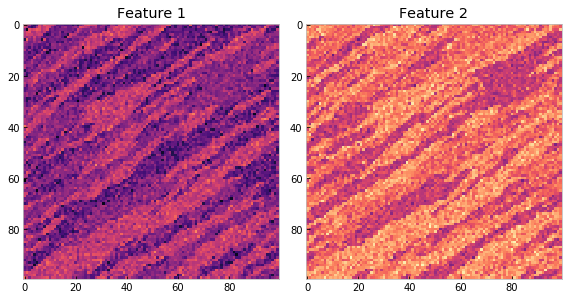

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(8,5))

f = [f1, f2]
for i,a in enumerate(ax):
    p = a.imshow(f[i], interpolation="nearest", vmin=np.min(features), vmax=np.max(features), cmap="magma")
    a.grid(False)
    a.set_title("Feature "+str(i+1))
fig.tight_layout()

## Segmentation

In [90]:
clf = BaySeg(features, 3)

In [93]:
clf.fit(500, beta_jump_length=0.1, cov_volume_jump_length=0.0000005)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:39<00:00, 12.75it/s]


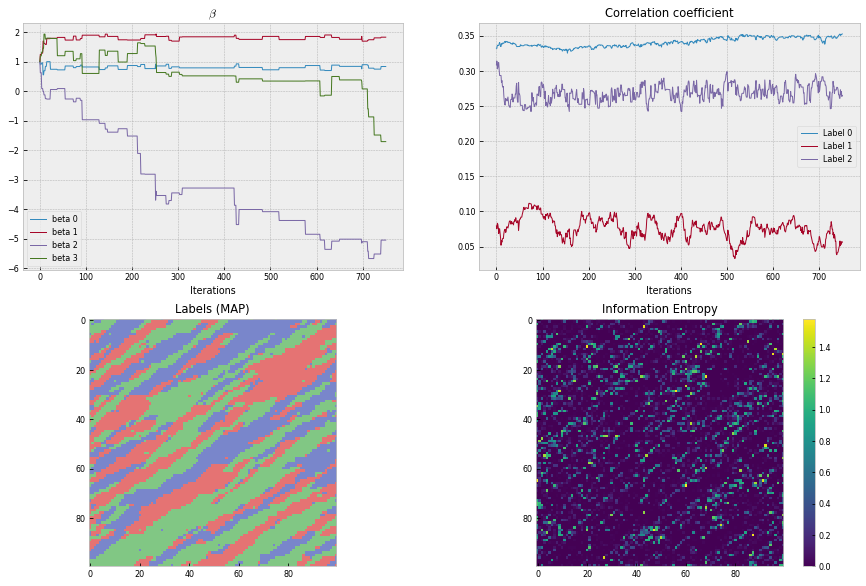

In [97]:
clf.diagnostics_plot(transpose=False)

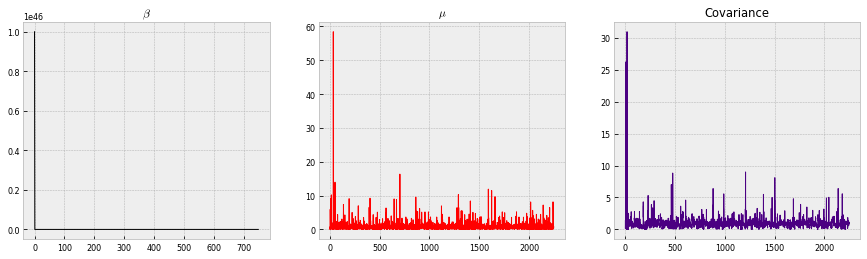

In [98]:
clf.plot_acc_ratios()